Hypothesis Testing
==================
We will explore issues regarding simple hypothesis testing in this notebook. 
We will first simulate a sample drawn from a normal random variable with a specified mean and variance and test it against a different mean. 

In [1]:
#import the usual modules
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
#Draw a sample
mu = 3 #setting the true mean.
sigma = 1 #setting the true variance.
N = 30 #setting sample size.
sample0 = sps.norm.rvs(size=N, loc=mu, scale=sigma)
sample0_mean = np.mean(sample0)
sample0_variance = np.var(sample0,ddof=1)
#print the sample mean and variance
print('The sample mean is {0:.4} and the sample variance is {1:.4}'.format(sample0_mean, sample0_variance)) 

The sample mean is 3.185 and the sample variance is 1.536


In practice, you generally do not know the true mean. Let's assume we have good reason to believe the true mean in this case is 5. So we are testing 
$$ H_0: \mu = 5 $$
$$ H_0: \mu \neq 5$$
We know this is not ture, so our t-test should reject the null under reasonable level of significance, let say 5%. 

In [33]:
null = 5 #set the null value. 
#calculate the test statistics
tstat = (sample0_mean-null)/np.power(sample0_variance/N,0.5)
print('The t-statistic in this case is {0:.4}'.format(tstat))

The t-statistic in this case is -8.023


The t-statistics follows a t-distribution with $N-1=29$ degrees of freedom. 

In [38]:
alpha = 0.05 #define the significance level of the test.
cv = sps.t.isf([1-alpha/2,alpha/2],df=N-1)
pvalue = 2*(1-sps.t.cdf(abs(tstat),df=N-1))
print('The critical values are {0:.4} and {1:.04}'.format(*cv))
print('The p-value is {0:.4}'.format(pvalue))


The critical values are -2.045 and 2.045
The p-value is 7.569e-09


So we reject the null. 

Exercise
========
1. If you change the null value from 5 to 3 (the true value). Will you still reject the null? 
2. Carry out the same test again using the scipy.stats.ttest_1samp() function. This function carries out the t-test for you rather than having to define the t-statistics and generate critical value like the above. Do you get identical results? 

$\alpha$ - Significance level of the test
-----------------------------------------
The significance level of a test, $\alpha$, is the probability of Type I error (reject the true null) that one allows the test to have. To illustrate this, we will first draw B samples, each with N observations from a normal random variable. Then we will conduct a t-test to test the true null for each sample. We should expect 5% of the t-tests incorrectly rejects the null.

The percentage of rejection is 0.053


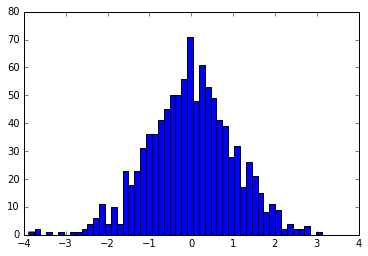

In [48]:
B = 1000 #setting the number of repeated sample. 
samples = sps.norm.rvs(size=(B,N), loc=mu, scale=sigma) #the true mean is mu. 
result = sps.ttest_1samp(samples,mu,axis=1)
plt.hist(result[0], bins=50) #plot the test statistics
per_reject= sum([i<alpha for i in result[1]])/B #counting the number of reject cases
print('The percentage of rejection is {0:.4}'.format(per_reject))

Exercise
========
What happens as you increase the number of repeated samples? 

$1-\beta$ - The power of the test
---------------------------------
$\beta$ is the probability of Type II error (accepting the false null). $1-\beta$ is often known as the power of the test, the ability of a test to reject the false null. 

In [57]:
incr = -2 #set deviation from true null
falsenull = mu+incr #set a false null
result_beta = sps.ttest_1samp(samples,falsenull,axis=1) # testing against the false null. 
plt.hist(result_beta[0], bins=50) #plot the test statistics
per_reject_falsenull= sum([i<alpha for i in result_beta[1]])/B #calculate the percentage of reject cases
print('The percentage of rejection is {0:.4}'.format(per_reject_falsenull))

The percentage of rejection is 1.0


Exercise
========
The result above seems to suggest that the test is never wrong - the test always managed to reject the false null. What happens when you make *falsenull* closer and closer to the true null *mu*? Can you explain the results there? 

Exercise
========
Write a block of code, possibly a function, to examine the dist